# 타이타닉 생존자 예측

In [3]:
import numpy as np
import pandas as pd  #행과 열로 이루어진 데이터 객체 생성. 대용량 데이터 처리에 적합
import matplotlib.pyplot as plt
import seaborn as sns  #데이터 시각화를 위한 라이브러리

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno  #결측치 데이터 시각화

import warnings
warnings.filterwarnings('ignore')  #python의 warning 메세지를 차단하는 것

%matplotlib inline  
#화면에 시각화된 결과를 바로 띄우라는 커맨드

### 처리 과정

1. 데이터 셋 확인 : 혹시 모를 null data를 확인, 수정

2. 탐색적 데이터 분석 : 여러 feature들을 개별적으로 분석하고 상관관계를  확인. 그 후 여러 시각화 툴을 사용하여 insight를 얻음.

3. feature engineering : 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering 한다. (one-hot encoding, class로 나누기 ...)
    
    --> 상당히 중요한 과정. 방법도 다양한 듯하다.
    
4. model 만들기 : sklearn을 사용해 모델 생성. (tensorflow나 pytorch도 사용 가능)
    
5. 모델 학습 및 예측 : trainset을 통해 모델을 학습시킨 후 testset을 통해 predict

6. 모델 평가 : 예측 성능 평가


#### Dataset 확인 

In [4]:
df_train = pd.read_csv('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/Titanic/data/train.csv')
df_test = pd.read_csv('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/Titanic/data/test.csv')

In [5]:
df_train.head()  #pandas에서 사용하는 데이터 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

feature : Pclass, Age, SibSp, 등등이며 target label은 Survived이다.

In [7]:
df_train.describe()  #각 feature가 가진 통계치 반환

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Null data check

In [9]:
#null값이 percentage로 환산되어 출력됨.

for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))  #isnull : null값을 다른 값으로 대체
    print(msg) 

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


In [10]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))  #isnull : null값을 다른 값으로 대체
    print(msg) 

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


--> Age와 Cabin에서 둘다 null값이 존재, Embarked에서는 traindata에만 null값 존재

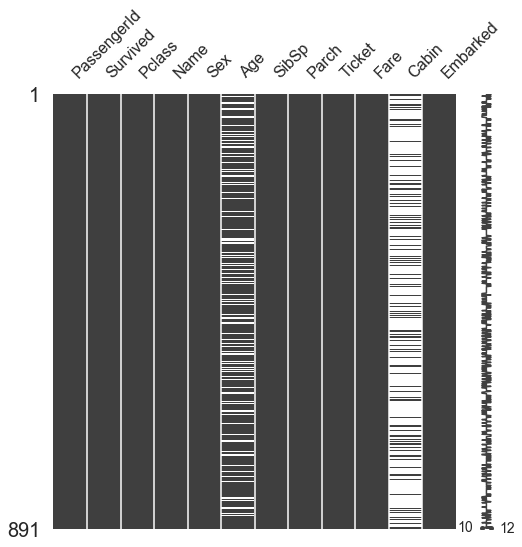

In [11]:
msno.matrix(df = df_train.iloc[:,:], figsize = (8,8))

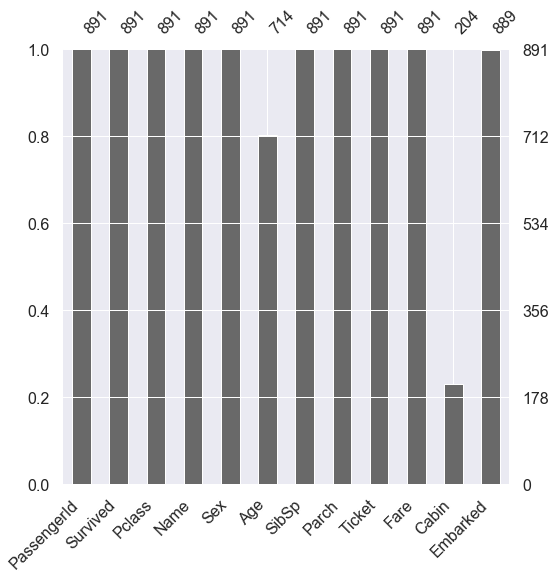

In [12]:
msno.bar(df=df_train.iloc[:,:],figsize = (8,8))

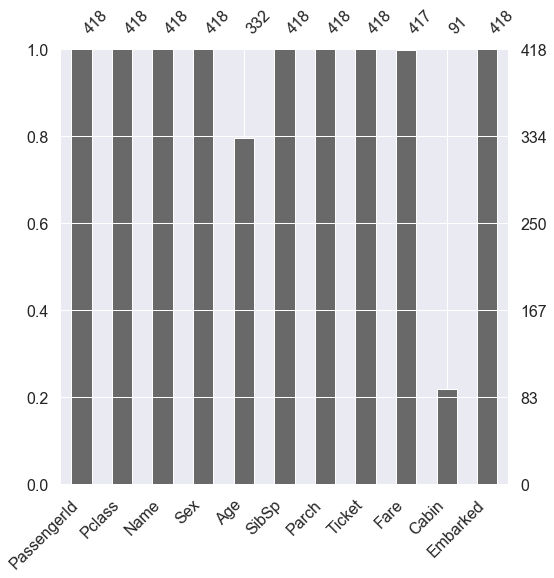

In [13]:
msno.bar(df = df_test.iloc[:,:],figsize = (8,8))

### target label 확인

target label(SurVived)가 어떤 distribution을 갖는지 확인해야함

위와같은 binary classification에서 1과 0의 분포에 따라 모델의 평가 방식이 달라짐.

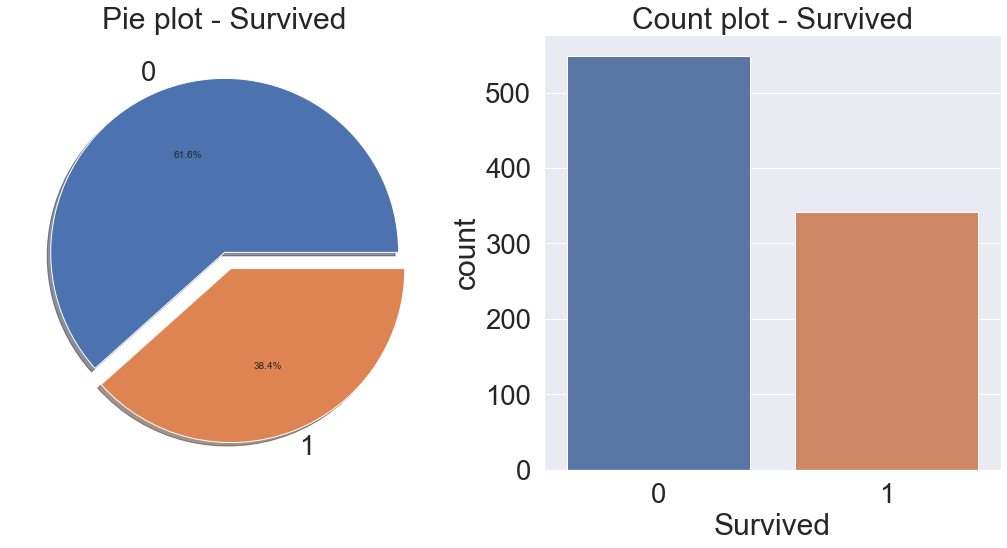

In [14]:
f, ax = plt.subplots(1,2,figsize=(18,8))  #subplot : 한번에 여러 그래프를 보여주기 위해 사용

#value_counts : 어떤 컬럼/Series의 unique value를 count해주는 함수. plot.pie : 파이형으로 차트 그리기 
df_train['Survived'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',ax = ax[0],shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
#countplot : 막대그래프
sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

38.4%가 살아남은것을 확인할 수 있다.

target label이 제법 balanced하다.

### EDA

데이터 분석과정. 시각화는 필수이다.

Pclass : ordinal(카테고리이면서 순서 존재) 데이터
groupby 함수를 통해서 엑셀과 유사한 작업을 할 것이다.

    --> Pclass와 Survived를 가져온 후 pclass로 묶고 생존률 출력

In [15]:
#.count를 통해 각 class에 몇명이 있는지 확인 가능
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
#.sum을 통해 class 존재하는 사람들 중 생존한 사람(Survived = 1)이 몇명인지 알 수 있음
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [17]:
#조금 더 직관적으로 정리 (crosstab 사용)

pd.crosstab(df_train['Pclass'],df_train['Survived'],margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


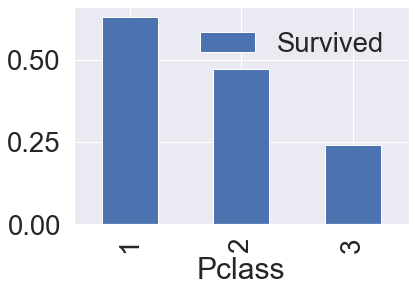

In [18]:
#각 group개체에 mean을 하게 되면 생존률을 얻을 수 있음

df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).mean().sort_values(by='Survived',ascending= False).plot.bar()

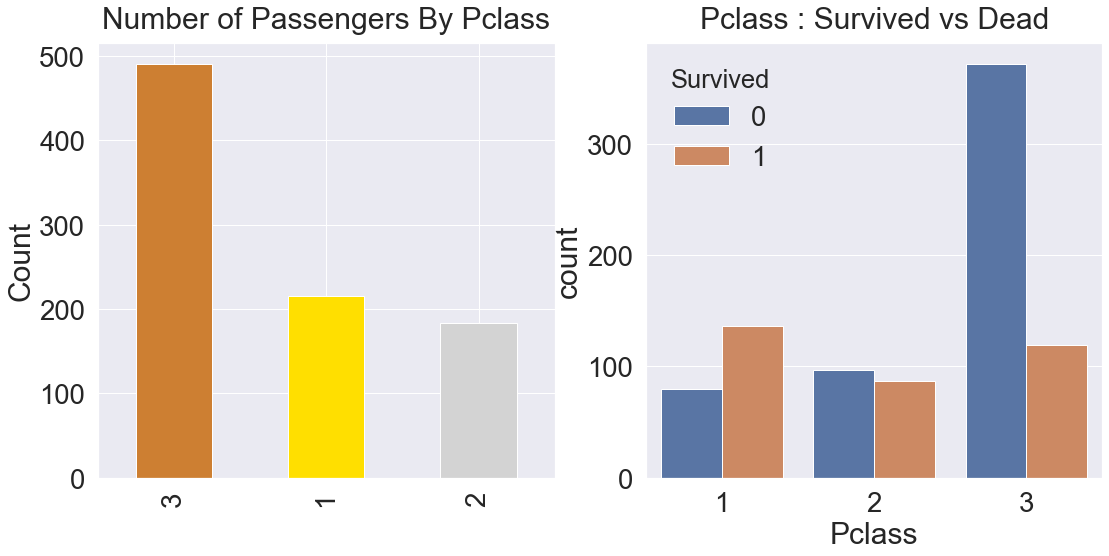

In [19]:
# seaborn의 countplot을 활용하면 label에 따른 개수를 확인 가능

y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'],ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y= y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived',data = df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

클래스가 높을 수록 생존 확률이 높은 것을 확인할 수 있다.

나중에 모델을 세울 때 Pclass라는 feature를 사용해야 한다고 판단 가능

### sex

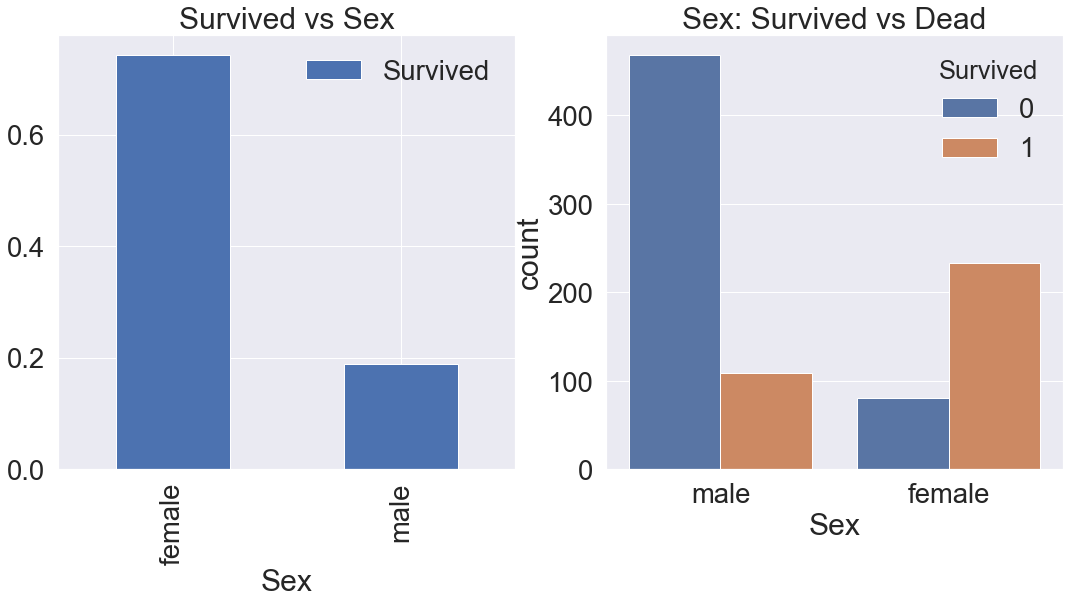

In [20]:
f, ax = plt.subplots(1,2,figsize = (18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
# as_index : 그룹을 인덱스로 지정할 것인가?
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue = 'Survived',data = df_train, ax=ax[1])  #hue를 기준으로 데이터를 조갠다
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [21]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins= True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지로 Sex feature도 유의미 하다는 것을 확인

### Both Sex and Pclass

seaborn과 factorplot을 이용하여 3개의 차원으로 이루어진 그래프 생성

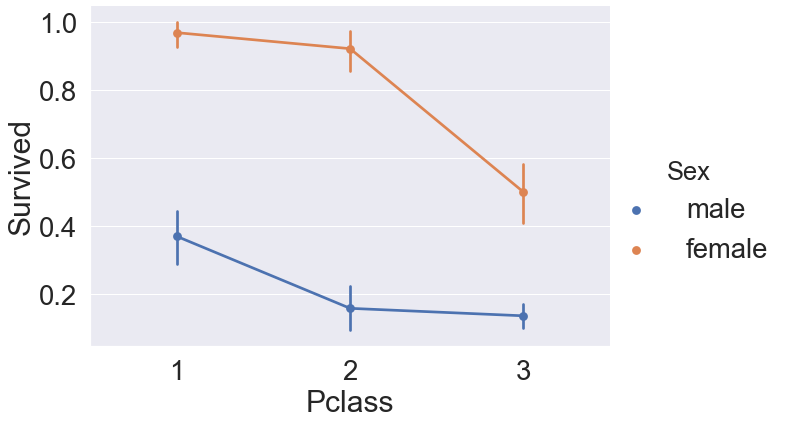

In [23]:
sns.factorplot('Pclass','Survived',hue = 'Sex',data = df_train,size = 6, aspect = 1.50)

모든 클래스에서 female이 male보다 생존확률이 높다.

성별에 상관없이 Pclass가 높을수록 생존확률이 높다.

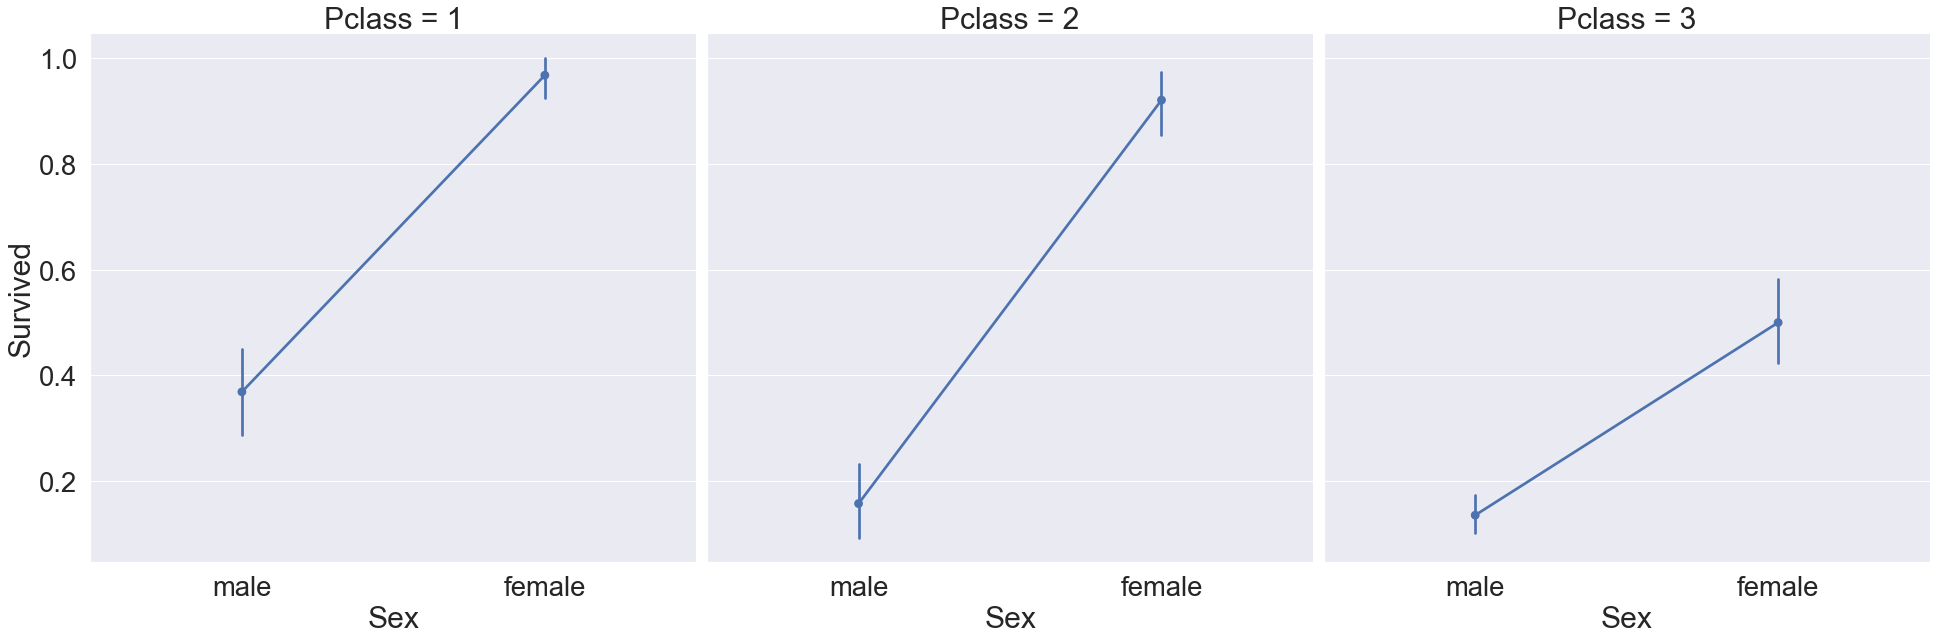

In [24]:
# hue 대신 column을 이용한다면

sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train, satureation=.5,size = 9, aspect = 1)

### Age

In [25]:
print('제일 나이 만흔 탑승객 : {:.1f}Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 만흔 탑승객 : 80.0Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


생존에 따른 Age histogram

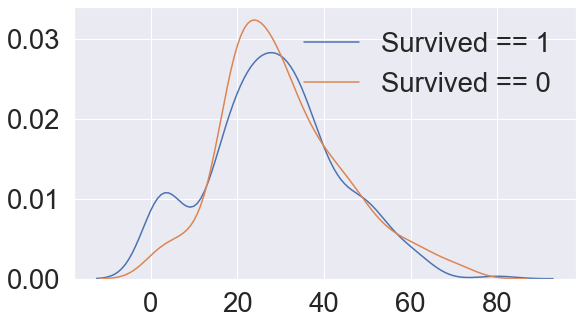

In [27]:
fig, ax = plt.subplots(1,1,figsize = (9,5)) 
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax = ax)  #kdeplot : 히스토그램보다 완만한 곡선의 그래프를 그림
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax = ax)
plt.legend(['Survived == 1','Survived == 0'])  #범례 추가
plt.show()

나이가 어린경우 생존확률이 높다

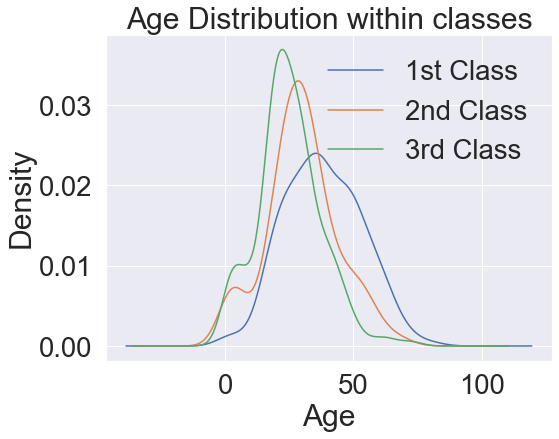

In [28]:
# Pclass에 따른 Age_distribution

plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')  #Pclass가 1 인 사람들에 대한 나이 분포
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

Class가 높을수록 나이 많은 사람의 비중이 커짐

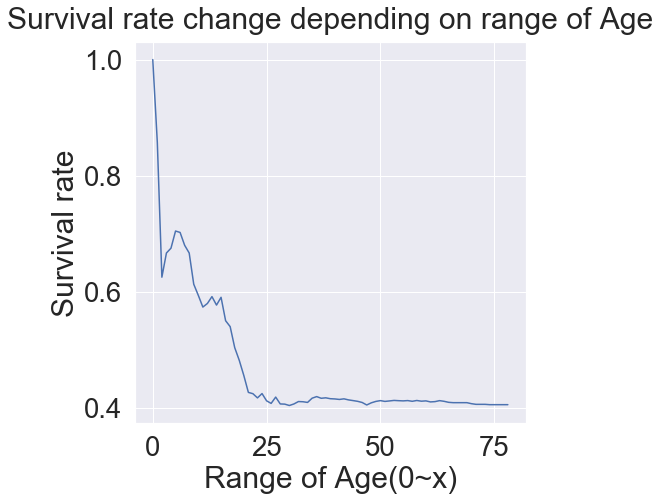

In [30]:
#나이대와 생존률의 관계 확인. 나이범위를 넓혀가며 생존률이 어떻게 되는지 확인할 것임.

cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

어릴수록 생존률이 높다.

--> 나이가 중요한 feature이다

### Pclass, Sex, Age

위 세 지표의 종합적인 그래프를 그려보자. (violinplot 사용)

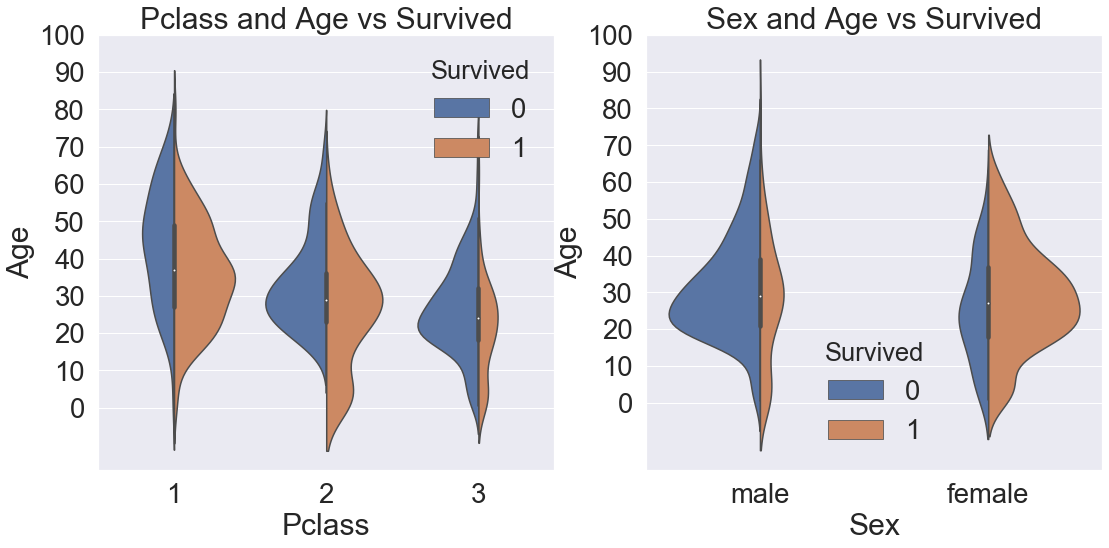

In [32]:
#Pclass, Sex 별로 Age의 distribution이 어떻게 다른지 + 생존여부를 고려한 그래프.

f,ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot("Pclass","Age", hue="Survived",data = df_train, scale = 'count',split = True, ax= ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived",data = df_train, scale = 'count',split = True, ax= ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

모든 class에서 나이가 어릴수록 생존률이 높다.

female이 male보다 생존률이 높다. 

--> 여자와 아이를 먼저 챙긴 것을 확인할 수 있다.

### Embarked (탑승항구)

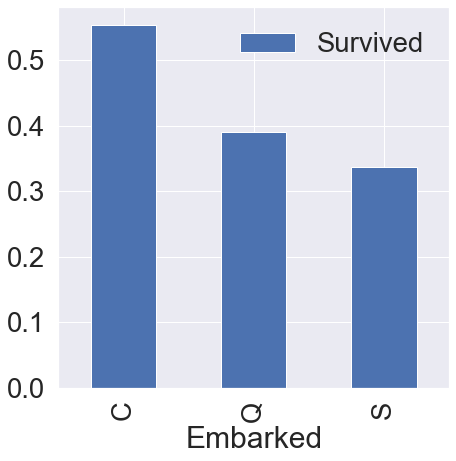

In [35]:
f,ax = plt.subplots(1,1,figsize = (7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index = True).mean().sort_values(by='Survived',ascending = False).plot.bar(ax = ax)  #값에 따른 데이터 정렬

뚜렷한 경향성을 보이지는 않지만 일단 feature로 사용

모델을 만들고 나면 우리가 사용한 feauture들의 중요성을 확인할 수 있다.

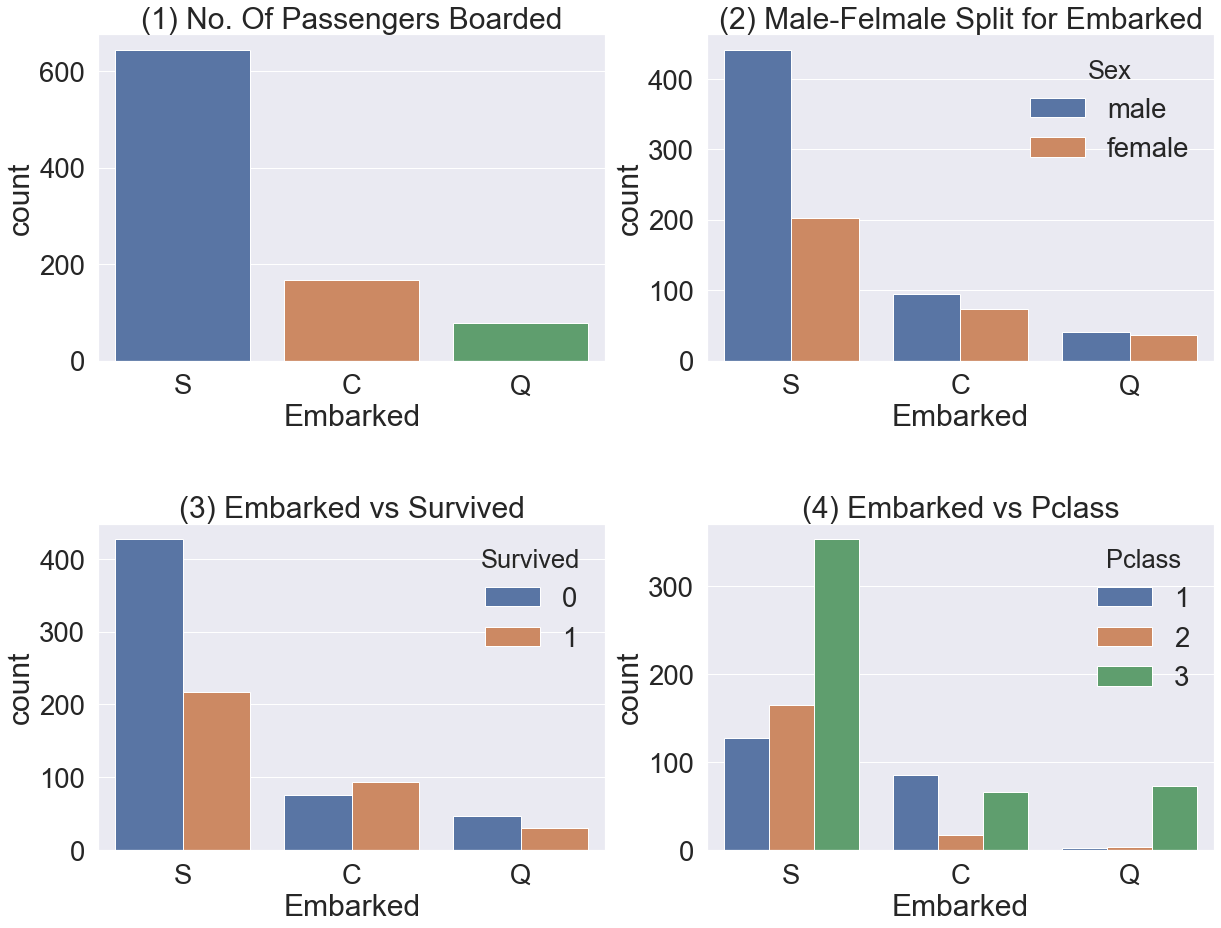

In [36]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data = df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue = 'Sex', data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Felmale Split for Embarked')
sns.countplot('Embarked',hue = 'Survived', data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue = 'Pclass', data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

figure(1) - 전체적으로 봤을 때 S항구에서 압도적으로 많은 수의 사람들이 탑승함

figure(2) - c와 q의 남녀 답승비율은 비슷하지만 s는 남자가 압도적으로 많다.

figure(3) - s의 생존확률이 많이 낮다.

figure(4) - s는 3rd class의 사람들이 많이 탑승하여 생존률이 낮고 c는 1st class의 사람들이 많이 탑승하여 생존률이 높다.

### Family (SibSp + Parch)

In [37]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  #기준인 나도 포함해야하니 1을 더해준다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


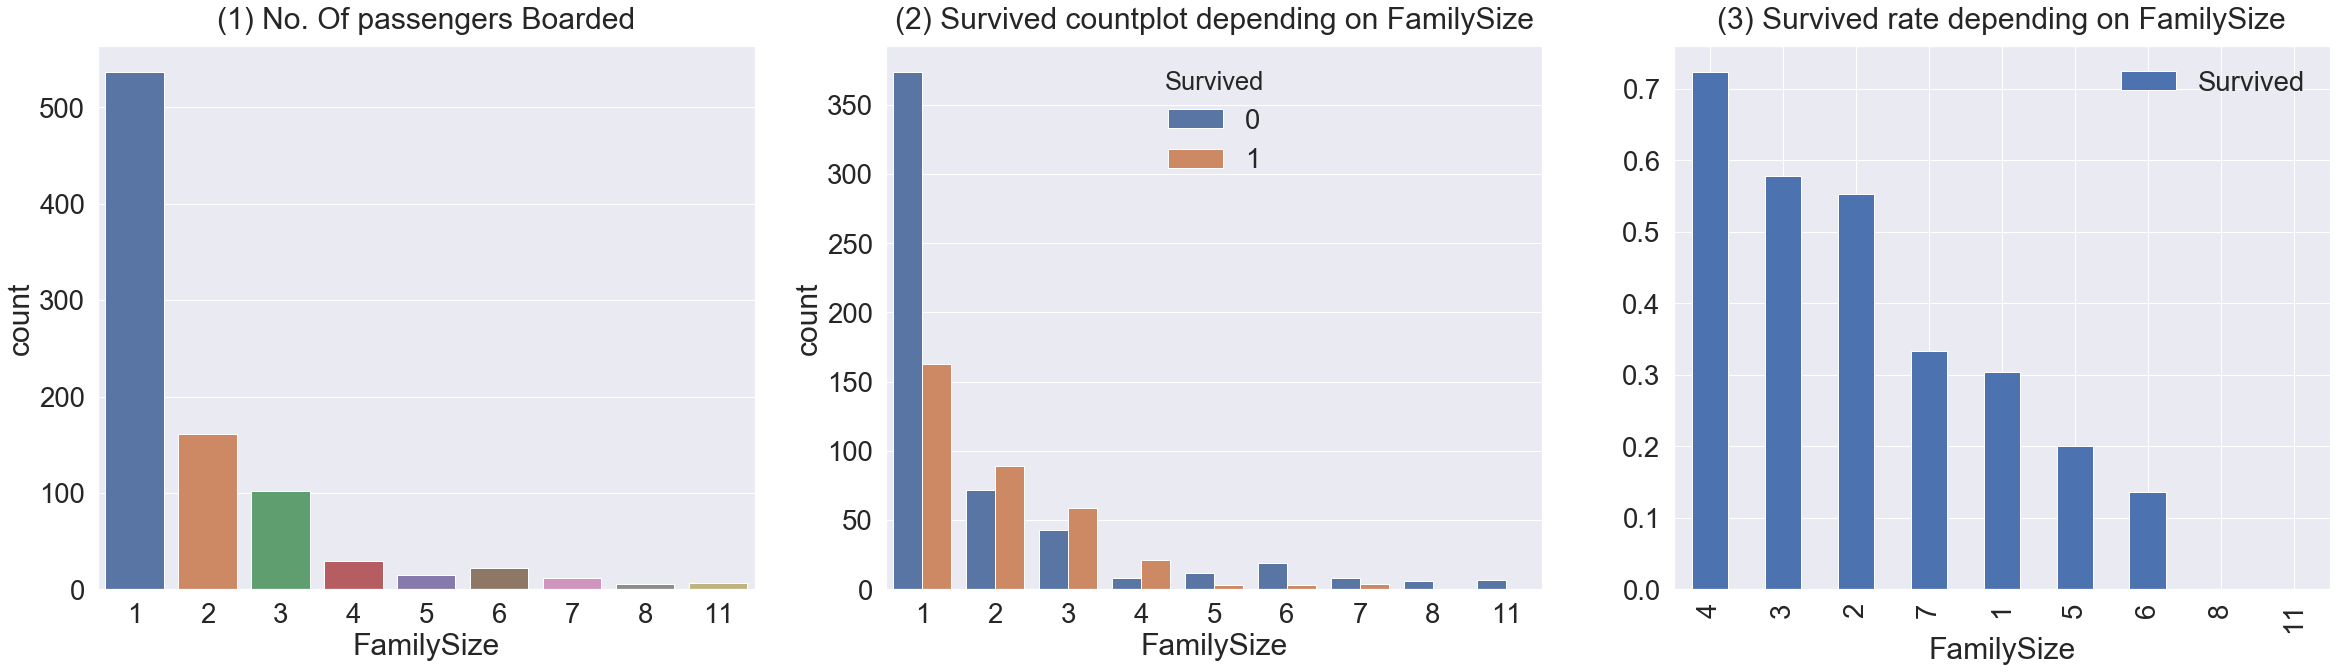

In [38]:
f,ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data = df_train, ax=ax[0])
ax[0].set_title('(1) No. Of passengers Boarded', y = 1.02)

sns.countplot('FamilySize',hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index = True).mean().sort_values(by='Survived',ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

figure(1) - 가족의 크기가 11~1이다. 대부분 혼자 탑승한 사람들이 많다.

figure(2) - 4명 가족의 생존률이 가장 높았다. 너무 작거나(1) 너무 크다면(5,6,8,11) 생존확률이 작아진다.

### Fare(탑승요금)

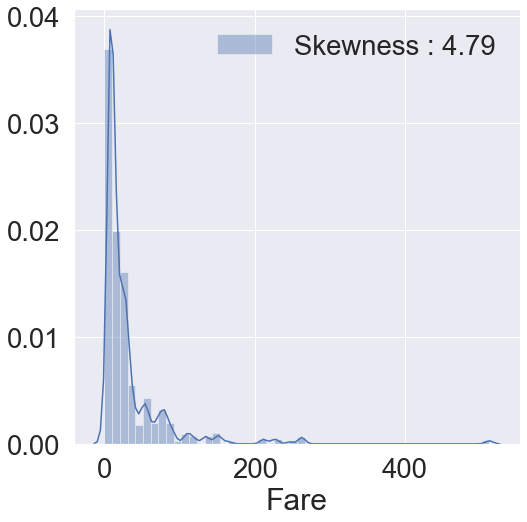

In [43]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)  #distplot : histogram과 kdeplot을 함께 그려주는 함수
g = g.legend(loc='best')  #skew : 비대칭도

distribution이 매우 비대칭 (high skewness), 위와 같은 데이터를 바로 모델에 넣어준다면 모델이 잘못된 학습을 할 가능성이 높다.(몇개 없는 outlier에 대해서 민감하게 반응할 수 있기 때문)

--> outlier의 영향을 줄이기 위해 Fare값에 log를 취하자.

pandas의 유용한 기능 : dataframe의 특정 columns에 공통된 작업(함수)를 취하고 쉽다면 map 또는 apply함수를 사용하면 손쉽게 할 수 있다. (매우 유용한 기능!)

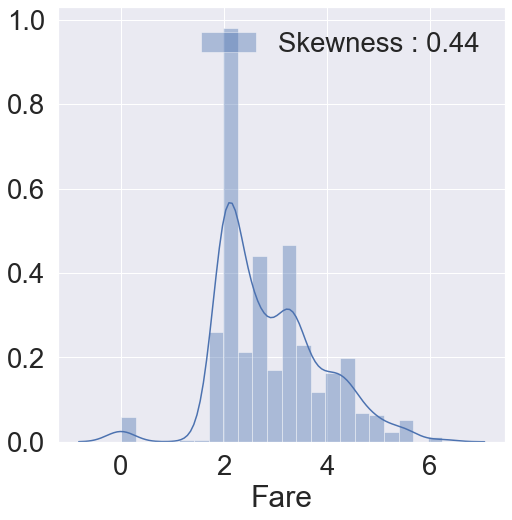

In [44]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()  #testdata에 존재하는 null데이터를 평균갑으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i >0 else 0)  #map함수를 사용해 column에 log 취해주기
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i >0 else 0)

fig,ax = plt.subplots(1,1,figsize = (8,8))
g = sns.distplot(df_train['Fare'],color = 'b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g=g.legend(loc='best')

log를 취하니 skewness가 적어진 것을 볼 수 있다.(비대칭성 완화)

이 작업은 feature engineering 과정이다.

feature engineering : 모델의 성능을 높이기 위해 feature들에 조작을 가하거나 새로운 feature를 추가하는 것. 중요한 작업!

### Cabin

위 feature는 NaN값이 80%이므로 유의미한 정보를 얻기 힘듬 --> 모델에 포함시키지 않음

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### Ticket

string datatype이기 때문에 어떤 과정을 거쳐야 실제 모델에 적용시킬 수 있다.

In [46]:
df_train['Ticket'].value_counts()

1601        7
347082      7
CA. 2343    7
347088      6
CA 2144     6
           ..
350417      1
349244      1
3101264     1
3101276     1
382649      1
Name: Ticket, Length: 681, dtype: int64

위와 같이, ticket number는 매우 다양하다. --> 따로 전처리 필요!